In [36]:
# https://pubs.acs.org/doi/10.1021/acs.jctc.2c01057

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from numpy import linalg as LA

from qiskit import transpile
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info.operators import Operator
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from IPython.display import clear_output
from scipy.sparse.linalg import eigs
from scipy import sparse
import math
import time
from joblib import Parallel, delayed
import multiprocessing as multip
from qiskit.quantum_info import Statevector

# Measure qubits

https://docs.quantum.ibm.com/guides/measure-qubits

In [37]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [38]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(5, 5)
qc.x(0)
qc.x(1)
qc.x(4)


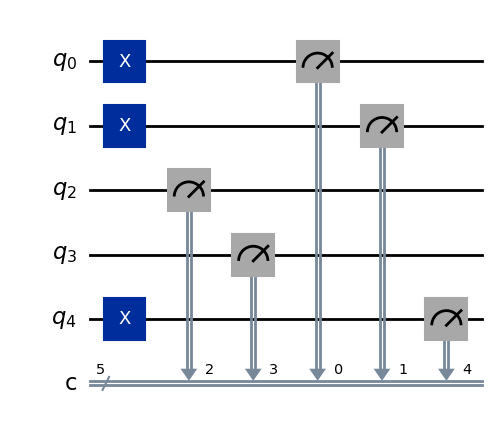

In [39]:
qc.measure(range(5), range(5)) #  Measures all qubits into the corresponding clbit.
qc.draw("mpl")

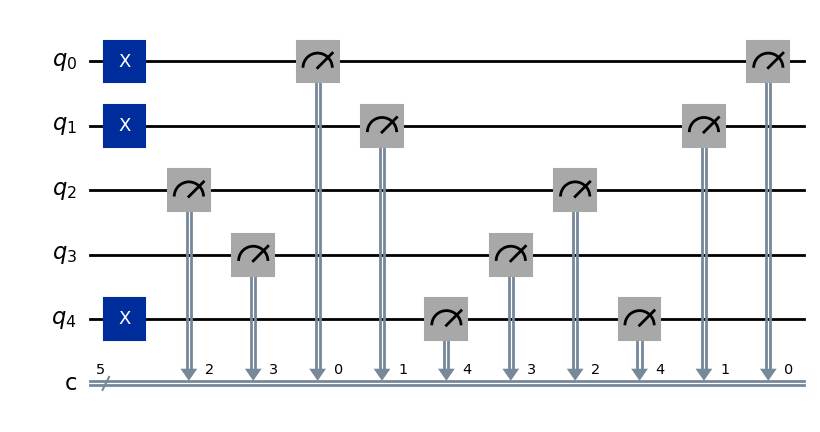

In [40]:
ind = list(range(5))  # 所有量子比特的索引
rind = ind  # 反转后的经典比特索引列表
rind.reverse()  # 反转经典比特索引
qc.measure(ind, rind)  # 测量量子比特到经典比特


qc.draw("mpl")

In [41]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3, 1)
qc.x([0, 2])
qc.measure(0, 0)    # Measure qubit 1 into the classical bit 0.
print(qc)

     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
q_1: ──────╫─
     ┌───┐ ║ 
q_2: ┤ X ├─╫─
     └───┘ ║ 
c: 1/══════╩═
           0 


In [42]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(5, 5)
qc.x(0)
qc.x(1)
qc.x(4)
qc.measure(range(5), range(5)) #  Measures all qubits into the corresponding clbit.

In [43]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3, 1)
qc.x([0, 2])
print(qc.draw())
qc.measure(1, 0)    # Measure qubit 1 into the classical bit 0.

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
c: 1/═════
          


In [44]:
# https://pubs.acs.org/doi/10.1021/acs.jctc.2c01057

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from numpy import linalg as LA

from qiskit import transpile
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info.operators import Operator
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from IPython.display import clear_output
from scipy.sparse.linalg import eigs
from scipy import sparse
import math
import time
from joblib import Parallel, delayed
import multiprocessing as multip
from qiskit.quantum_info import Statevector


# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)
weights = np.random.uniform(0, 2 * np.pi, 3)
# qc.h(0)
qc.rx(weights[0],0)  # Apply Rx gate
qc.ry(weights[1],0)  # Apply Rx gate
qc.rx(weights[2],0)  # Apply Rx gate
qc.sdg(0)  # Apply S† gate
qc.h(0)    # Apply Hadamard gate
qc.measure(0, 0)  # Measure the qubit

print(qc)

simulator = AerSimulator()  # 创建量子模拟器
qc = transpile(qc, simulator)

     ┌─────────────┐┌────────────┐┌────────────┐┌─────┐┌───┐┌─┐
  q: ┤ Rx(0.42235) ├┤ Ry(3.6915) ├┤ Rx(2.2134) ├┤ Sdg ├┤ H ├┤M├
     └─────────────┘└────────────┘└────────────┘└─────┘└───┘└╥┘
c: 1/════════════════════════════════════════════════════════╩═
                                                             0 


['0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

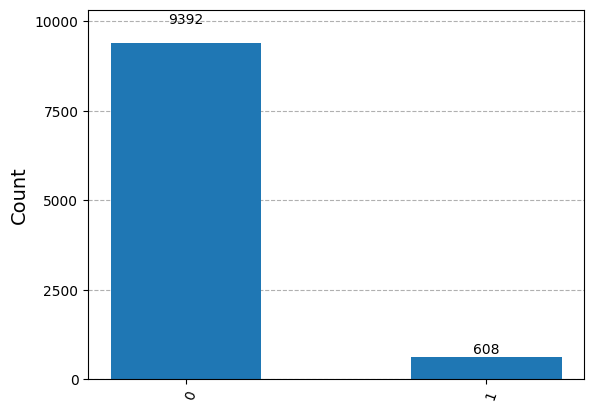

In [45]:
SHOTS=10000
result = simulator.run(qc, shots=SHOTS, memory=True).result()
c = result.get_memory(qc)
print(c)

counts = result.get_counts(qc)
from qiskit.visualization import plot_histogram, plot_state_city
plot_histogram(counts)

To verify that the average value of the observable $X_1 Z_2$ for a two-qubit system measured in the state $\frac{|00\rangle+|11\rangle}{\sqrt{2}}$ is zero using the Qiskit simulator, we can follow these steps:

In [46]:

from qiskit.quantum_info import Statevector, Operator
import numpy as np

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Prepare the Bell state |00> + |11> / sqrt(2)
qc.h(0)  # Apply Hadamard to qubit 0
qc.cx(0, 1)  # Apply CNOT with control qubit 0 and target qubit 1

# Define the observable X1 Z2
X1 = Operator.from_label('X')  # Pauli-X on qubit 1
Z2 = Operator.from_label('Z')  # Pauli-Z on qubit 2
observable = X1.tensor(Z2)  # Combined operator X1 Z2

# Create the simulator
simulator = AerSimulator()

# Get the statevector for the Bell state
state = Statevector.from_instruction(qc)

# Calculate the expectation value of the observable
expectation_value = state.expectation_value(observable)

# Print the result
print(f"Expectation value of X1 Z2: {expectation_value}")


Expectation value of X1 Z2: 0j


In [47]:
from qiskit import QuantumCircuit
# from qiskit.providers.aer import AerSimulator
# from qiskit.visualization import plot_histogram

# 创建量子电路，使用 3 个量子比特
qc = QuantumCircuit(3, 3)

# 准备量子态 (|000⟩ + |111⟩)/√2
qc.h(0)  # 将第一个量子比特置于叠加态
qc.cx(0, 1)  # 使用 CNOT 门纠缠第一个和第二个量子比特
qc.cx(0, 2)  # 使用 CNOT 门纠缠第一个和第三个量子比特

# 定义可观测量 ZZZ
# 我们将 Z 操作应用于每个量子比特，且不做测量，只计算期望值
qc.measure([0, 1, 2], [0, 1, 2])

# 选择模拟器后端
simulator = AerSimulator()

# 执行模拟
result = simulator.run(qc, shots=1024).result()

# 获取测量结果
counts = result.get_counts(qc)

# 打印测量结果
print(counts)

# 计算期望值
# 期望值 = P(000) - P(111) 
P_000 = counts.get('000', 0) / 1024
P_111 = counts.get('111', 0) / 1024
expectation_value = P_000 - P_111

print(f"Expectation value of ZZZ: {expectation_value}")


{'111': 504, '000': 520}
Expectation value of ZZZ: 0.015625


In [107]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp

n=3
matrix = np.random.rand(2**n, 2**n) + 1j * np.random.rand(2**n, 2**n)
matrix = (matrix + matrix.conj().T) / 2

observable = SparsePauliOp.from_operator(matrix)
print(observable)
print(observable.size)

Hmat = Operator(observable)
print(np.linalg.norm(Hmat-matrix))

SparsePauliOp(['III', 'IIX', 'IIY', 'IIZ', 'IXI', 'IXX', 'IXY', 'IXZ', 'IYI', 'IYX', 'IYY', 'IYZ', 'IZI', 'IZX', 'IZY', 'IZZ', 'XII', 'XIX', 'XIY', 'XIZ', 'XXI', 'XXX', 'XXY', 'XXZ', 'XYI', 'XYX', 'XYY', 'XYZ', 'XZI', 'XZX', 'XZY', 'XZZ', 'YII', 'YIX', 'YIY', 'YIZ', 'YXI', 'YXX', 'YXY', 'YXZ', 'YYI', 'YYX', 'YYY', 'YYZ', 'YZI', 'YZX', 'YZY', 'YZZ', 'ZII', 'ZIX', 'ZIY', 'ZIZ', 'ZXI', 'ZXX', 'ZXY', 'ZXZ', 'ZYI', 'ZYX', 'ZYY', 'ZYZ', 'ZZI', 'ZZX', 'ZZY', 'ZZZ'],
              coeffs=[ 0.54641729+0.j,  0.38480949+0.j,  0.11647995+0.j,  0.12869206+0.j,
  0.59991696+0.j,  0.59555376+0.j,  0.12382826+0.j, -0.0034388 +0.j,
 -0.13090915+0.j, -0.00566175+0.j, -0.10225274+0.j, -0.04713502+0.j,
 -0.09330785+0.j, -0.1125098 +0.j, -0.18079205+0.j, -0.18911724+0.j,
  0.40100167+0.j,  0.48535539+0.j, -0.00865224+0.j,  0.066449  +0.j,
  0.5282461 +0.j,  0.35576722+0.j,  0.06008799+0.j, -0.21109799+0.j,
 -0.18342103+0.j, -0.05167794+0.j,  0.14877988-0.j,  0.04364512+0.j,
  0.15660652+0.j,  0.07053672+0.